In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

In [57]:
# Load the data into a pandas dataframe
df = pd.read_excel('Exocharts_bitmex_XBTUSD_Trend_Rev-320-190.xlsx', skiprows=10, usecols="B:AO")

In [58]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = df[["Open", "High", "Low", "Close", "OI", "OI Delta", "Volume", "Delta", "CVD", "POC", "Trades count", "Sell trades", "Buy trades", "Trades per second", "Sells per second", "Buys per second"]]
scaled_data = scaler.fit_transform(data)

In [59]:
# Define the number of timesteps and the number of features
timesteps = 10
num_features = scaled_data.shape[1]

In [60]:
# Create the dataset for the LSTM model
X = np.zeros((len(scaled_data) - timesteps, timesteps, num_features))
y = np.zeros((len(scaled_data) - timesteps))
for i in range(timesteps, len(scaled_data)):
    X[i - timesteps] = scaled_data[i - timesteps:i]
    y[i - timesteps] = scaled_data[i, 3] # 3 is the index of the 'Close' column

In [61]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, num_features)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the data
model.fit(X, y, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
326/326 [==============================] - 2s 2ms/step - loss: 0.0074
Epoch 2/10
326/326 [==============================] - 1s 3ms/step - loss: 0.0029
Epoch 3/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 4/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 5/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 6/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 7/10
326/326 [==============================] - 1s 3ms/step - loss: 0.0016
Epoch 8/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 9/10
326/326 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 10/10
326/326 [==============================] - 1s 3ms/step - loss: 0.0015


In [62]:
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Create the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(timesteps, num_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Fit the model to the data
model.fit(X, y, epochs=50, batch_size=32, verbose=1, validation_split=0.1, callbacks=[early_stop])

Epoch 1/50
10/10 [==============================] - 5s 104ms/step - loss: 0.0536 - val_loss: 0.1829
Epoch 2/50
10/10 [==============================] - 0s 26ms/step - loss: 0.0176 - val_loss: 0.0042
Epoch 3/50
10/10 [==============================] - 0s 33ms/step - loss: 0.0084 - val_loss: 0.0404
Epoch 4/50
10/10 [==============================] - 0s 25ms/step - loss: 0.0070 - val_loss: 0.0384
Epoch 4: early stopping


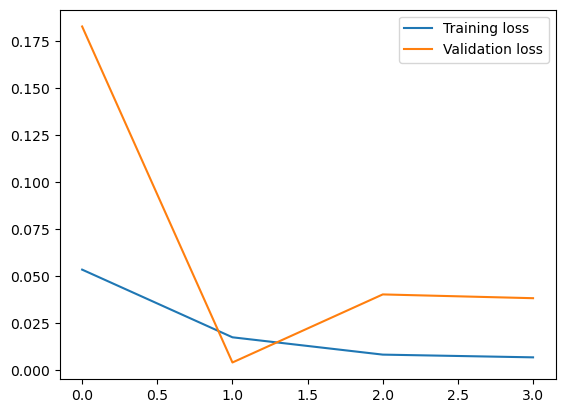

In [63]:
# plot the training loss and validation loss to see if the model is overfitting
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()

In [64]:
# Make predictions
predictions = model.predict(X)

11/11 [==============================] - 1s 7ms/step


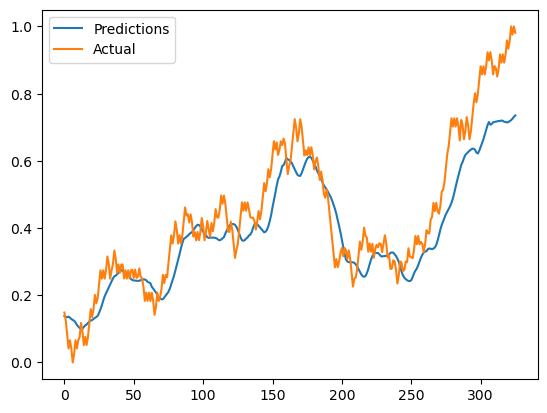

In [65]:
# Plot the predictions
plt.plot(predictions)
plt.plot(y)
plt.legend(['Predictions', 'Actual'])
plt.show()

In [66]:
# what is the shape of the predictions?
predictions.shape

(326, 1)